In [14]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, zscore, levene, ttest_ind, mannwhitneyu
import numpy as np
import pandas as pd
from tabulate import tabulate

In [10]:
def process_data(filename, type="sleep"):
    data = pd.read_pickle(filename)[type]
    split_dfs = {}
    
    for n in data:  # 5, 35
        for language in data[n]:  # rust, cpp, nonservice
            summary_rows = []
            for df in data[n][language]: #each experiment
                if "PACKAGE_ENERGY (J)" in df.columns:
                    energy = df["PACKAGE_ENERGY (J)"].iloc[-1] - df["PACKAGE_ENERGY (J)"].iloc[0]
                    if "TIME" in df.columns:
                        time_diff = df['TIME'].iloc[-1] - df['TIME'].iloc[0]
                    elif "Time" in df.columns:
                        time_diff = df['Time'].iloc[-1] - df['Time'].iloc[0]
                    summary_rows.append({
                        "PACKAGE ENERGY (J)": energy,
                        "EDP": time_diff,
                        "tool": language,
                        "type": n
                    })
                

            summary_df = pd.DataFrame(summary_rows)
            # remove outliers from each experiment set
            if 'PACKAGE ENERGY (J)' in summary_df.columns:
                z_scores = zscore(summary_df['PACKAGE ENERGY (J)'])
                full_df = summary_df[np.abs(z_scores) < 2]

            split_dfs[f"{language}_{type}_{n}"] = full_df
    
    return split_dfs

In [11]:
data_sleep = process_data("results.pkl", "sleep")
data_fib = process_data("results.pkl", "fib")

data_sleep_p_data = [
    ["Rust", shapiro(data_sleep['rust_sleep_10']['PACKAGE ENERGY (J)'])[1], shapiro(data_sleep['rust_sleep_20']['PACKAGE ENERGY (J)'])[1], shapiro(data_fib['rust_fib_10']['PACKAGE ENERGY (J)'])[1], shapiro(data_fib['rust_fib_35']['PACKAGE ENERGY (J)'])[1], shapiro(data_fib['rust_fib_40']['PACKAGE ENERGY (J)'])[1]],
    ["C++", shapiro(data_sleep['cpp_sleep_10']['PACKAGE ENERGY (J)'])[1], shapiro(data_sleep['cpp_sleep_20']['PACKAGE ENERGY (J)'])[1], shapiro(data_fib['cpp_fib_10']['PACKAGE ENERGY (J)'])[1], shapiro(data_fib['cpp_fib_35']['PACKAGE ENERGY (J)'])[1], shapiro(data_fib['cpp_fib_40']['PACKAGE ENERGY (J)'])[1]],
    ["Classic", shapiro(data_sleep['nonservice_sleep_10']['PACKAGE ENERGY (J)'])[1], shapiro(data_sleep['nonservice_sleep_20']['PACKAGE ENERGY (J)'])[1], shapiro(data_fib['nonservice_fib_10']['PACKAGE ENERGY (J)'])[1], shapiro(data_fib['nonservice_fib_35']['PACKAGE ENERGY (J)'])[1], shapiro(data_fib['nonservice_fib_40']['PACKAGE ENERGY (J)'])[1]],
]
print(tabulate(data_sleep_p_data, headers=["Type", "Sleep(10)", "Sleep(20)", "Fib(10)", "Fib(35)", "Fib(40)"], tablefmt="grid"))


+---------+-------------+-------------+-------------+-------------+-------------+
| Type    |   Sleep(10) |   Sleep(20) |     Fib(10) |     Fib(35) |     Fib(40) |
+=========+=============+=============+=============+=============+=============+
| Rust    |    0.301927 |    0.583192 | 1.27111e-05 | 0.0883172   | 0.00148101  |
+---------+-------------+-------------+-------------+-------------+-------------+
| C++     |    0.539135 |    0.122816 | 0.000463756 | 0.0264623   | 0.00282737  |
+---------+-------------+-------------+-------------+-------------+-------------+
| Classic |    0.863428 |    0.808974 | 0.686482    | 0.000408684 | 9.96085e-05 |
+---------+-------------+-------------+-------------+-------------+-------------+


In [3]:
fig, axes = plt.subplots(2, 1, figsize=(7, 12))

ax = sns.violinplot(ax=axes[0], x="tool", y="PACKAGE ENERGY (J)", data=pd.concat([data_sleep['rust_sleep_10'], data_sleep['cpp_sleep_10'], data_sleep['nonservice_sleep_10']]))
axes[0].set_title("Sleep(10)")
axes[0].set_ylabel("ENERGY (J)")
axes[0].set_xticklabels(["Rust Service", "C++ Service", "Classic"])

ax = sns.violinplot(ax=axes[1], x="tool", y="PACKAGE ENERGY (J)", data=pd.concat([data_sleep['rust_sleep_20'], data_sleep['cpp_sleep_20'], data_sleep['nonservice_sleep_20']]))
axes[1].set_title("Sleep(20)")
axes[1].set_ylabel("ENERGY (J)")
axes[1].set_xticklabels(["Rust Service", "C++ Service", "Classic"])

plt.show()

NameError: name 'plt' is not defined

/tmp/ipykernel_178139/509324810.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(["Rust Service", "C++ Service", "Classic"])
/tmp/ipykernel_178139/509324810.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(["Rust Service", "C++ Service", "Classic"])
/tmp/ipykernel_178139/509324810.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(["Rust Service", "C++ Service", "Classic"])


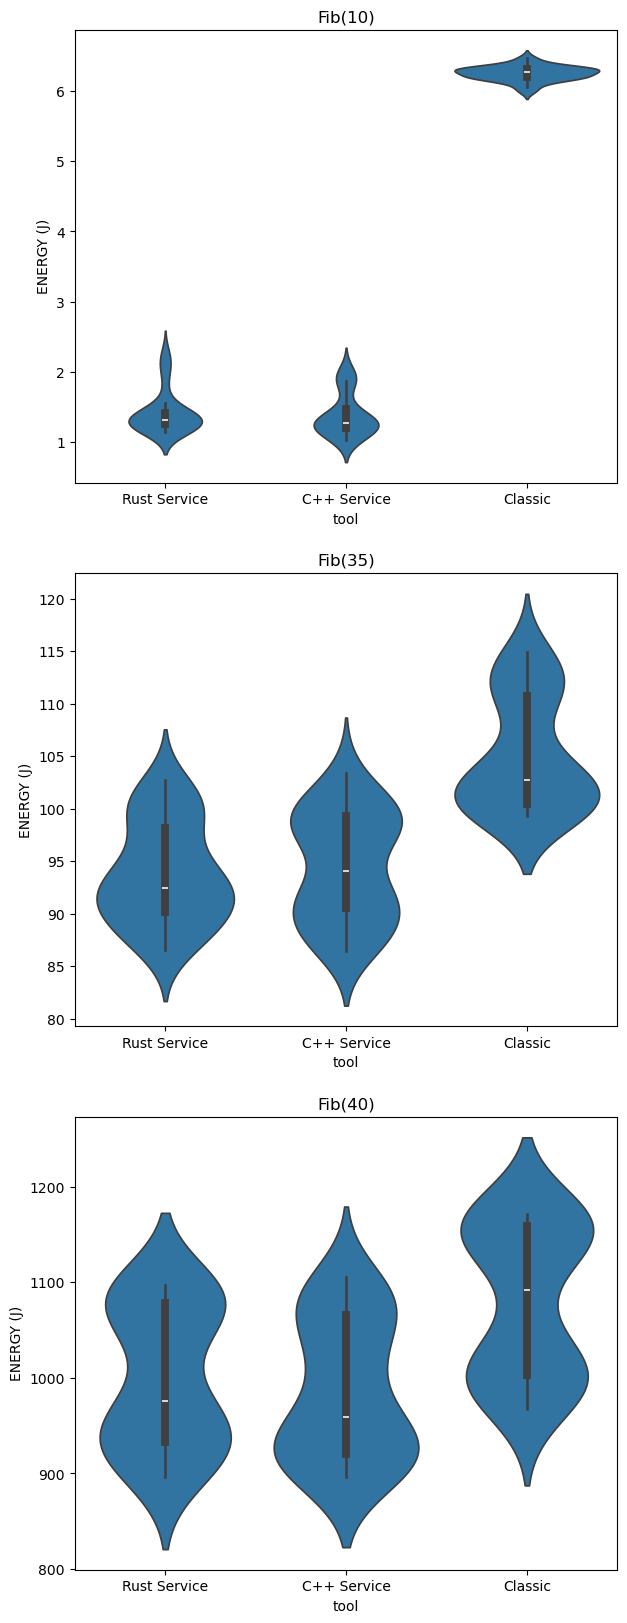

In [8]:
fig, axes = plt.subplots(3, 1, figsize=(7, 20))

ax = sns.violinplot(ax=axes[0], x="tool", y="PACKAGE ENERGY (J)", data=pd.concat([data_fib['rust_fib_10'], data_fib['cpp_fib_10'], data_fib['nonservice_fib_10']]))
axes[0].set_title("Fib(10)")
axes[0].set_ylabel("ENERGY (J)")
axes[0].set_xticklabels(["Rust Service", "C++ Service", "Classic"])

ax = sns.violinplot(ax=axes[1], x="tool", y="PACKAGE ENERGY (J)", data=pd.concat([data_fib['rust_fib_35'], data_fib['cpp_fib_35'], data_fib['nonservice_fib_35']]))
axes[1].set_title("Fib(35)")
axes[1].set_ylabel("ENERGY (J)")
axes[1].set_xticklabels(["Rust Service", "C++ Service", "Classic"])

ax = sns.violinplot(ax=axes[2], x="tool", y="PACKAGE ENERGY (J)", data=pd.concat([data_fib['rust_fib_40'], data_fib['cpp_fib_40'], data_fib['nonservice_fib_40']]))
axes[2].set_title("Fib(40)")
axes[2].set_ylabel("ENERGY (J)")
axes[2].set_xticklabels(["Rust Service", "C++ Service", "Classic"])

plt.show()

/tmp/ipykernel_11144/4251735799.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Rust Service", "C++ Service", "Classic"])
/tmp/ipykernel_11144/4251735799.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Rust Service", "C++ Service", "Classic"])


Text(0, 0.5, '')

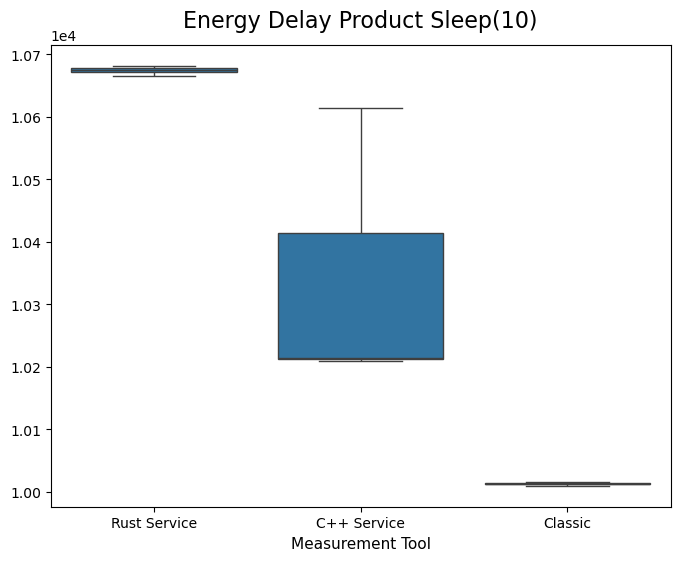

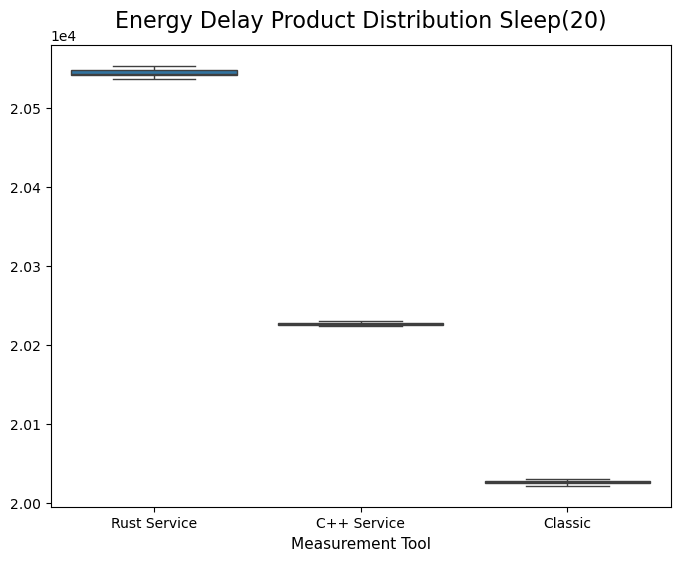

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='tool', y='EDP', data=pd.concat([data_sleep['rust_sleep_10'], data_sleep['cpp_sleep_10'], data_sleep['nonservice_sleep_10']]), showfliers=False)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.title('Energy Delay Product Sleep(10)', fontsize=16, y=1.02)
ax.set_xticklabels(["Rust Service", "C++ Service", "Classic"])
plt.xlabel('Measurement Tool', fontsize=11)plt.figure(figsize=(7, 6))
plt.ylabel('')

plt.figure(figsize=(8,6))
ax = sns.boxplot(x='tool', y='EDP', data=pd.concat([data_sleep['rust_sleep_20'], data_sleep['cpp_sleep_20'], data_sleep['nonservice_sleep_20']]), showfliers=False)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.title('Energy Delay Product Distribution Sleep(20)', fontsize=16, y=1.02)
ax.set_xticklabels(["Rust Service", "C++ Service", "Classic"])
plt.xlabel('Measurement Tool', fontsize=11)
plt.ylabel('')

/tmp/ipykernel_11144/476950635.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Rust Service", "C++ Service", "Classic"])
/tmp/ipykernel_11144/476950635.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Rust Service", "C++ Service", "Classic"])
/tmp/ipykernel_11144/476950635.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Rust Service", "C++ Service", "Classic"])


Text(0, 0.5, '')

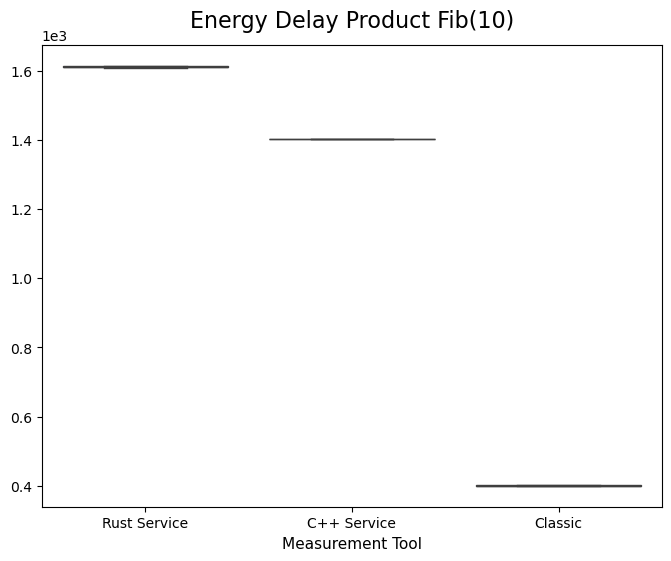

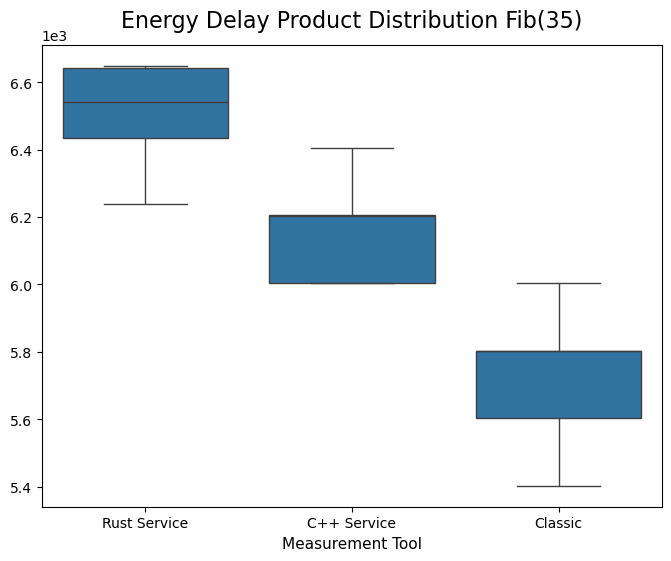

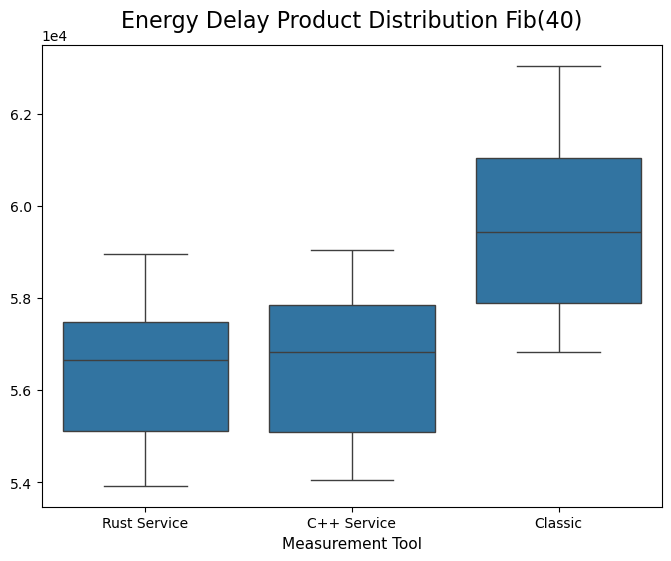

In [124]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='tool', y='EDP', data=pd.concat([data_fib['rust_fib_10'], data_fib['cpp_fib_10'], data_fib['nonservice_fib_10']]), showfliers=False)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.title('Energy Delay Product Fib(10)', fontsize=16, y=1.02)
ax.set_xticklabels(["Rust Service", "C++ Service", "Classic"])
plt.xlabel('Measurement Tool', fontsize=11)
plt.ylabel('')

plt.figure(figsize=(8,6))
ax = sns.boxplot(x='tool', y='EDP', data=pd.concat([data_fib['rust_fib_35'], data_fib['cpp_fib_35'], data_fib['nonservice_fib_35']]), showfliers=False)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.title('Energy Delay Product Distribution Fib(35)', fontsize=16, y=1.02)
ax.set_xticklabels(["Rust Service", "C++ Service", "Classic"])
plt.xlabel('Measurement Tool', fontsize=11)
plt.ylabel('')

plt.figure(figsize=(8,6))
ax = sns.boxplot(x='tool', y='EDP', data=pd.concat([data_fib['rust_fib_40'], data_fib['cpp_fib_40'], data_fib['nonservice_fib_40']]), showfliers=False)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.title('Energy Delay Product Distribution Fib(40)', fontsize=16, y=1.02)
ax.set_xticklabels(["Rust Service", "C++ Service", "Classic"])
plt.xlabel('Measurement Tool', fontsize=11)
plt.ylabel('')

In [48]:
def run_ttest(df1, df2):
    _, levene_p = levene(df1, df2) # using levene test since it is more robust with non-normal data
    
    t_stat, p_value = ttest_ind(df1, df2, equal_var=(levene_p > 0.05))
    
    return p_value

In [ ]:
def run_manwhitneyu(df1, df2):
    _, p_value = mannwhitneyu(df1, df2)
    return p_value

In [62]:
# Comparing sleep in Rust vs Classic
p_rc_10 = run_ttest(data_sleep['rust_sleep_10']['PACKAGE ENERGY (J)'], data_sleep['nonservice_sleep_10']['PACKAGE ENERGY (J)'])
p_cc_10 = run_ttest(data_sleep['cpp_sleep_10']['PACKAGE ENERGY (J)'], data_sleep['nonservice_sleep_10']['PACKAGE ENERGY (J)'])

p_rc_20 = run_ttest(data_sleep['rust_sleep_20']['PACKAGE ENERGY (J)'], data_sleep['nonservice_sleep_10']['PACKAGE ENERGY (J)'])
p_cc_20 = run_ttest(data_sleep['cpp_sleep_20']['PACKAGE ENERGY (J)'], data_sleep['nonservice_sleep_20']['PACKAGE ENERGY (J)'])

ttest_sleep = [
    [10, p_rc_10, p_cc_10],
    [20, p_rc_20, p_cc_20]
]

print(tabulate(ttest_sleep, headers=["Sleep (s)", "Rust", "C++"]))

  Sleep (s)         Rust          C++
-----------  -----------  -----------
         10  1.28217e-08  2.09002e-10
         20  5.18794e-64  0.0167908


In [ ]:
# Comparing fib(n) in Rust vs Classic
p_rc_10 = run_manwhitneyu(data_fib['rust_fib_10']['PACKAGE ENERGY (J)'], data_fib['nonservice_fib_10']['PACKAGE ENERGY (J)'])
p_rc_35 = run_manwhitneyu(data_fib['rust_fib_35']['PACKAGE ENERGY (J)'], data_fib['nonservice_fib_35']['PACKAGE ENERGY (J)'])
p_rc_40 = run_manwhitneyu(data_fib['rust_fib_40']['PACKAGE ENERGY (J)'], data_fib['nonservice_fib_40']['PACKAGE ENERGY (J)'])

# Comparing fib(n) in C++ vs Classic
p_cc_10 = run_manwhitneyu(data_fib['cpp_fib_10']['PACKAGE ENERGY (J)'], data_fib['nonservice_fib_10']['PACKAGE ENERGY (J)'])
p_cc_35 = run_manwhitneyu(data_fib['cpp_fib_35']['PACKAGE ENERGY (J)'], data_fib['nonservice_fib_35']['PACKAGE ENERGY (J)'])
p_cc_40 = run_manwhitneyu(data_fib['cpp_fib_40']['PACKAGE ENERGY (J)'], data_fib['nonservice_fib_40']['PACKAGE ENERGY (J)'])

# Comparing fib(n) in C++ vs Rust
p_cr_10 = run_manwhitneyu(data_fib['cpp_fib_10']['PACKAGE ENERGY (J)'], data_fib['rust_fib_10']['PACKAGE ENERGY (J)'])
p_cr_35 = run_manwhitneyu(data_fib['cpp_fib_35']['PACKAGE ENERGY (J)'], data_fib['rust_fib_35']['PACKAGE ENERGY (J)'])
p_cr_40 = run_manwhitneyu(data_fib['cpp_fib_40']['PACKAGE ENERGY (J)'], data_fib['rust_fib_40']['PACKAGE ENERGY (J)'])

ttest_fib_10 = [
    ["Rust", "-", p_cr_10, p_rc_10],
    ["C++", p_cr_10, "-", p_cc_10],
    ["Classic", p_rc_10, p_cc_10, "-"],
]

ttest_fib_35 = [
    ["Rust", "-", p_cr_35, p_rc_35],
    ["C++", p_cr_35, "-", p_cc_35],
    ["Classic", p_rc_35, p_cc_35, "-"],
]

ttest_fib_40 = [
    ["Rust", "-", p_cr_40, p_rc_40],
    ["C++", p_cr_40, "-", p_cc_40],
    ["Classic", p_rc_40, p_cc_40, "-"],
]

print(tabulate(ttest_fib_10, headers=["Fib(10)", "Rust", "C++", "Classic"]), "\n")
print(tabulate(ttest_fib_35, headers=["Fib(35)", "Rust", "C++", "Classic"]), "\n")
print(tabulate(ttest_fib_40, headers=["Fib(40)", "Rust", "C++", "Classic"]))

Fib(10)    Rust                   C++                   Classic
---------  ---------------------  --------------------  ---------------------
Rust       -                      0.6570862524444913    4.254133831738916e-38
C++        0.6570862524444913     -                     6.49811224435164e-40
Classic    4.254133831738916e-38  6.49811224435164e-40  -
Fib(35)    Rust                   C++                    Classic
---------  ---------------------  ---------------------  ---------------------
Rust       -                      0.6242472866562316     6.882738219612363e-12
C++        0.6242472866562316     -                      1.296537208192558e-10
Classic    6.882738219612363e-12  1.296537208192558e-10  -
Fib(40)    Rust                    C++                     Classic
---------  ----------------------  ----------------------  ----------------------
Rust       -                       0.4594874343407225      0.00017844187450484687
C++        0.4594874343407225      -                 

In [ ]:
cpp_mean_sleep_10 = data_sleep['cpp_sleep_10']['PACKAGE ENERGY (J)'].mean()
cpp_mean_sleep_20 = data_sleep['cpp_sleep_20']['PACKAGE ENERGY (J)'].mean()
rust_mean_sleep_10 = data_sleep['rust_sleep_10']['PACKAGE ENERGY (J)'].mean()
rust_mean_sleep_20 = data_sleep['rust_sleep_20']['PACKAGE ENERGY (J)'].mean()
classic_mean_sleep_10 = data_sleep['nonservice_sleep_10']['PACKAGE ENERGY (J)'].mean()
classic_mean_sleep_20 = data_sleep['nonservice_sleep_20']['PACKAGE ENERGY (J)'].mean()

print(f"C++ => Sleep(10): {cpp_mean_sleep_10}, Sleep(20): {cpp_mean_sleep_20}")
print(f"Rust => Sleep(10): {rust_mean_sleep_10}, Sleep(20): {rust_mean_sleep_20}")
print(f"Classic => Sleep(10): {classic_mean_sleep_10}, Sleep(20): {classic_mean_sleep_20}", "\n")

cpp_mean_fib_10 = data_fib['cpp_fib_10']['PACKAGE ENERGY (J)'].mean()
cpp_mean_fib_35 = data_fib['cpp_fib_35']['PACKAGE ENERGY (J)'].mean()
cpp_mean_fib_40 = data_fib['cpp_fib_40']['PACKAGE ENERGY (J)'].mean()
rust_mean_fib_10 = data_fib['rust_fib_10']['PACKAGE ENERGY (J)'].mean()
rust_mean_fib_35 = data_fib['rust_fib_35']['PACKAGE ENERGY (J)'].mean()
rust_mean_fib_40 = data_fib['rust_fib_40']['PACKAGE ENERGY (J)'].mean()
classic_mean_fib_10 = data_fib['nonservice_fib_10']['PACKAGE ENERGY (J)'].mean()
classic_mean_fib_35 = data_fib['nonservice_fib_35']['PACKAGE ENERGY (J)'].mean()
classic_mean_fib_40 = data_fib['nonservice_fib_40']['PACKAGE ENERGY (J)'].mean()


print(f"C++ => Fib(10): {cpp_mean_fib_10}, Fib(35): {cpp_mean_fib_35}, Fib(40): {cpp_mean_fib_40}")
print(f"Rust => Fib(10): {rust_mean_fib_10}, Fib(35): {rust_mean_fib_35}, Fib(40): {rust_mean_fib_40}")
print(f"Classic => Fib(10): {classic_mean_fib_10}, Fib(35): {classic_mean_fib_35}, Fib(40): {classic_mean_fib_40}")

C++ => Sleep(10): 10.927326747348811, Sleep(20): 21.37308829171369
Rust => Sleep(10): 10.899891444615216, Sleep(20): 21.117244325835003
Classic => Sleep(10): 10.343091241244988, Sleep(20): 20.980022561960958 

C++ => Fib(10): 1.3784201485790877, Fib(35): 94.4418314615854, Fib(40): 986.4012919108118
